## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 10</span>

### Esercizio 10.1

In questo esercizio ho parallelizzato con le librerie **MPI** l'algoritmo genetico, sviluppato nell'Esercitazione precedente, in modo da risolvere il Traveling Salesman Problem eseguendo una *ricerca genetica* con 4 ricerche GA parallele del percorso ottimale.

Una semplice parallelizzazione aumenta il numero di simulazioni compiute contemporaneamente. Tuttavia, finchè questi processi non si parlano, non può esserci alcun modo in cui questi possano velocizzare globalmente la simulazione. Per questo, ogni $N_{migr}=3$ generazioni ho implementato una migrazione: tra i vari processi in atto ne vengono scelti causalmente due e i migliori individui delle due popolazioni corrispondenti ai due processi vengono tra di loro scambiati. Nel linguaggio degli algoritmi genetici questi processi paralleli vengono detti *Continenti*, proprio perché ospitano popolazioni che evolvono indipendentemente e che solo ogni tanto vengono in contatto e si scambiano materiale genetico.

Rispetto all'Esercitazione 9 ho modificato l'inizializzatore dei numeri casuali, in modo che in base al processo leggesse righe diverse dal file dei numeri primi, e generasse così sequenze di numeri casuali diverse per ogni *Continente*. Ho fatto anche in modo che la loss di processi diversi fosse distinta e che venisse stampata in diversi file.

### Esercizio 10.2

In questo esercizio ho applicato la parallelizzazione del codice che risolve il TSP e ho confrontato la soluzione senza migrazioni rispetto alla soluzione con migrazioni. In questo caso ho considerato i $110$ capoluoghi di provincia dell'Italia. Ho generato popolazioni da $1000$ individui e i parametri di evoluzione sono i seguenti:

  1. Parametro di selezione $p = 3.0$
  2. Probabilità di permutazione di una coppia $P_1 = 0.1$
  3. Probabilità di permutazione di un gruppo $P_3 = 0.1$
  4. Probabilità di inversione dell'ordine $P_4 = 0.1$
  5. Probabilità di Crossover $P_c = 0.9$

Ho usato 4 nodi in entrambi i casi: parto dalla simulazione senza migrazioni.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

/home/andrea/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_1 = pd.read_csv("Indipendenti/Es10_rank_0.csv", sep=',')
data_2 = pd.read_csv("Indipendenti/Es10_rank_1.csv", sep=',')
data_3 = pd.read_csv("Indipendenti/Es10_rank_2.csv", sep=',')
data_4 = pd.read_csv("Indipendenti/Es10_rank_3.csv", sep=',')

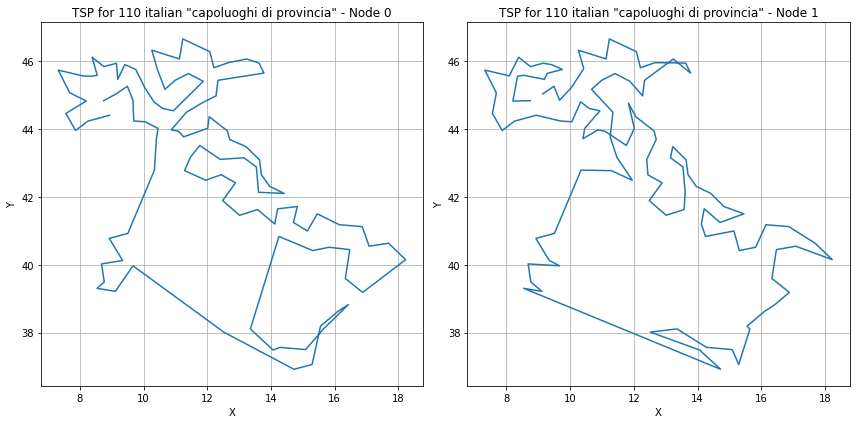

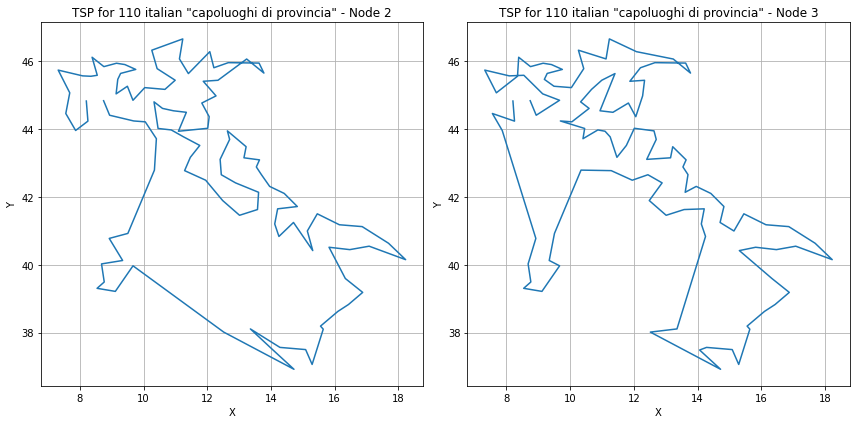

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(data_1['X'],data_1['Y'])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 0')
axs[0].grid(True)

axs[1].plot(data_2['X'],data_2['Y'])
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 1')
axs[1].grid(True)

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(data_3['X'],data_3['Y'])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 2')
axs[0].grid(True)

axs[1].plot(data_4['X'],data_4['Y'])
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 3')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Ho ottenuto quattro diversi percorsi, a visti tutti "abbastanza" buoni. Vediamo ora la loss dei vari percorsi:

In [4]:
loss_best_1 = pd.read_csv("Indipendenti/Es10_Loss_Best_rank_0.csv", sep=',')
loss_best_2 = pd.read_csv("Indipendenti/Es10_Loss_Best_rank_1.csv", sep=',')
loss_best_3 = pd.read_csv("Indipendenti/Es10_Loss_Best_rank_2.csv", sep=',')
loss_best_4 = pd.read_csv("Indipendenti/Es10_Loss_Best_rank_3.csv", sep=',')

loss_half_1 = pd.read_csv("Indipendenti/Es10_Loss_Half_rank_0.csv", sep=',')
loss_half_2 = pd.read_csv("Indipendenti/Es10_Loss_Half_rank_1.csv", sep=',')
loss_half_3 = pd.read_csv("Indipendenti/Es10_Loss_Half_rank_2.csv", sep=',')
loss_half_4 = pd.read_csv("Indipendenti/Es10_Loss_Half_rank_3.csv", sep=',')

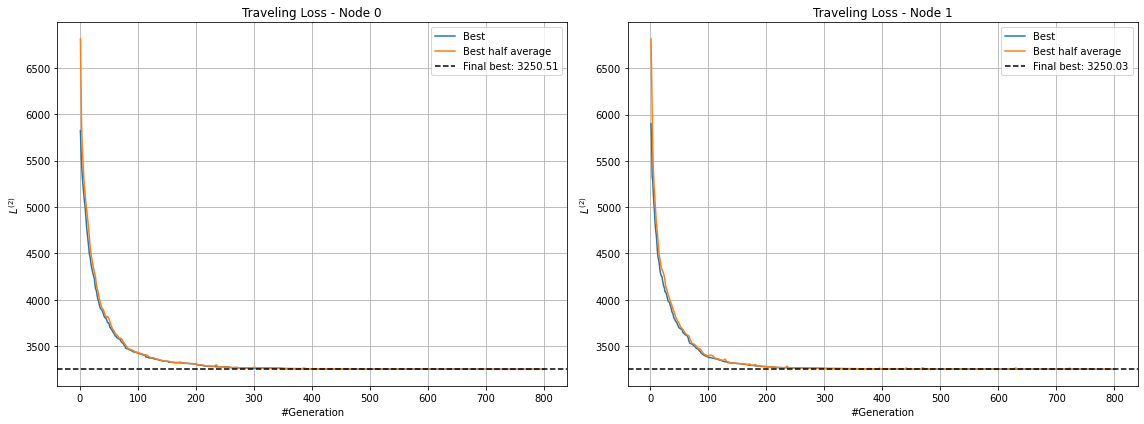

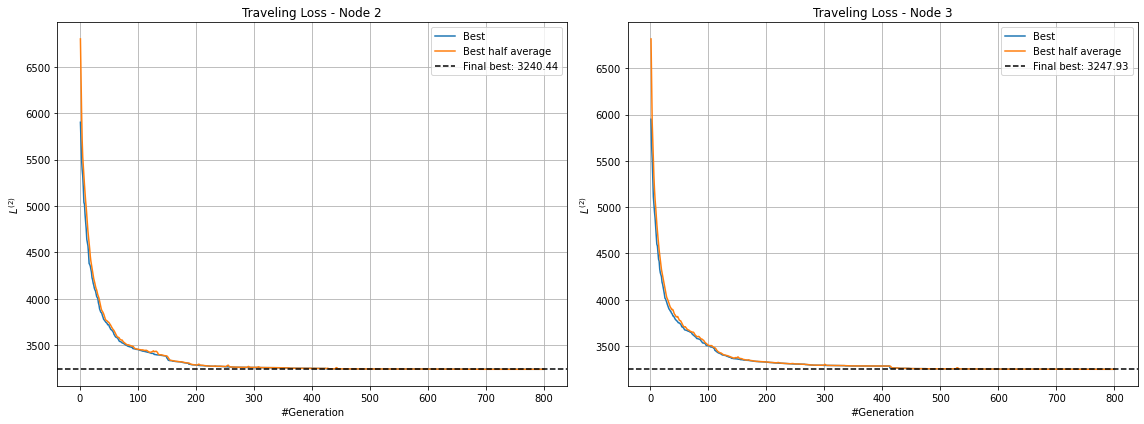

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(loss_best_1['Generazione'],loss_best_1['BestLoss'], label='Best')
axs[0].plot(loss_half_1['Generazione'],loss_half_1['HalfLoss'], label='Best half average')
axs[0].axhline(y=3250.51, color = "k", linestyle = "--", label = "Final best: 3250.51")
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel('$L^{(2)}$')
axs[0].set_title('Traveling Loss - Node 0')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(loss_best_2['Generazione'],loss_best_2['BestLoss'], label='Best')
axs[1].plot(loss_half_2['Generazione'],loss_half_2['HalfLoss'], label='Best half average')
axs[1].axhline(y=3250.03, color = "k", linestyle = "--", label = "Final best: 3250.03")
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel('$L^{(2)}$')
axs[1].set_title('Traveling Loss - Node 1')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(loss_best_3['Generazione'],loss_best_3['BestLoss'], label='Best')
axs[0].plot(loss_half_3['Generazione'],loss_half_3['HalfLoss'], label='Best half average')
axs[0].axhline(y=3240.44, color = "k", linestyle = "--", label = "Final best: 3240.44")
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel('$L^{(2)}$')
axs[0].set_title('Traveling Loss - Node 2')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(loss_best_4['Generazione'],loss_best_4['BestLoss'], label='Best')
axs[1].plot(loss_half_4['Generazione'],loss_half_4['HalfLoss'], label='Best half average')
axs[1].axhline(y=3247.93, color = "k", linestyle = "--", label = "Final best: 3247.93")
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel('$L^{(2)}$')
axs[1].set_title('Traveling Loss - Node 3')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

E' possibile osservare che i percorsi convergono "abbastanza" in fretta (circa $250$ generazioni) tranne che per l'ultimo nodo (circa $400$ generazioni). Probabilmente per farli spostare dal particolare minimo in cui si sono trovati servirebbero molte più generazioni.

Ora vedo invece cosa cosa succede implementando le migrazioni tra *Continenti* diversi in termini di velocità di convergenza e di qualità della soluzione ottenuta:

In [6]:
data_5 = pd.read_csv("Migrazioni/Es10_rank_0.csv", sep=',')
data_6 = pd.read_csv("Migrazioni/Es10_rank_1.csv", sep=',')
data_7 = pd.read_csv("Migrazioni/Es10_rank_2.csv", sep=',')
data_8 = pd.read_csv("Migrazioni/Es10_rank_3.csv", sep=',')

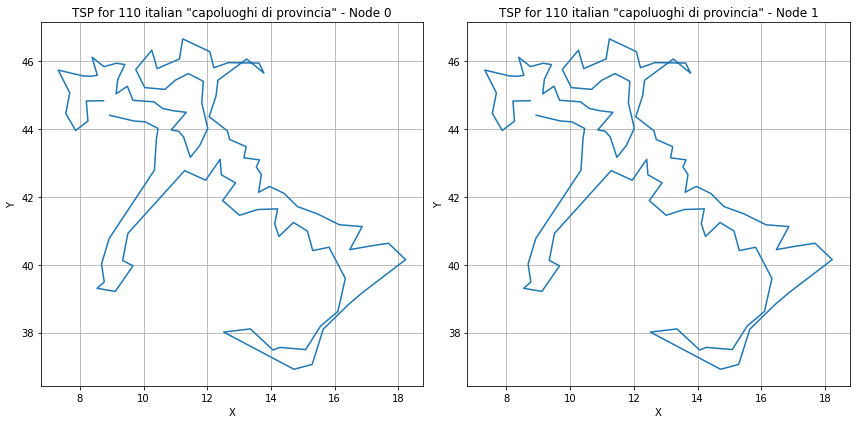

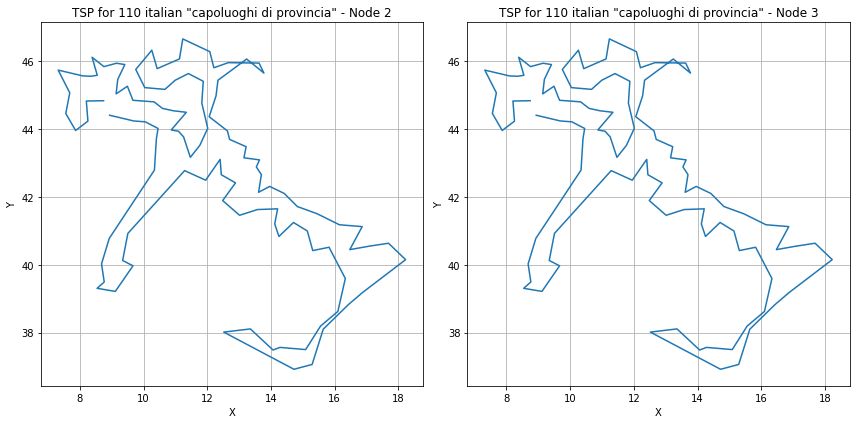

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(data_5['X'],data_5['Y'])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 0')
axs[0].grid(True)

axs[1].plot(data_6['X'],data_6['Y'])
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 1')
axs[1].grid(True)

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(data_7['X'],data_7['Y'])
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 2')
axs[0].grid(True)

axs[1].plot(data_8['X'],data_8['Y'])
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('TSP for 110 italian "capoluoghi di provincia" - Node 3')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Da notare che i percorsi sono tra di loro identici: le migrazioni hanno per ora tolto "varietà" alle soluzioni del problema.

In [8]:
loss_best_5 = pd.read_csv("Migrazioni/Es10_Loss_Best_rank_0.csv", sep=',')
loss_best_6 = pd.read_csv("Migrazioni/Es10_Loss_Best_rank_1.csv", sep=',')
loss_best_7 = pd.read_csv("Migrazioni/Es10_Loss_Best_rank_2.csv", sep=',')
loss_best_8 = pd.read_csv("Migrazioni/Es10_Loss_Best_rank_3.csv", sep=',')

loss_half_5 = pd.read_csv("Migrazioni/Es10_Loss_Half_rank_0.csv", sep=',')
loss_half_6 = pd.read_csv("Migrazioni/Es10_Loss_Half_rank_1.csv", sep=',')
loss_half_7 = pd.read_csv("Migrazioni/Es10_Loss_Half_rank_2.csv", sep=',')
loss_half_8 = pd.read_csv("Migrazioni/Es10_Loss_Half_rank_3.csv", sep=',')

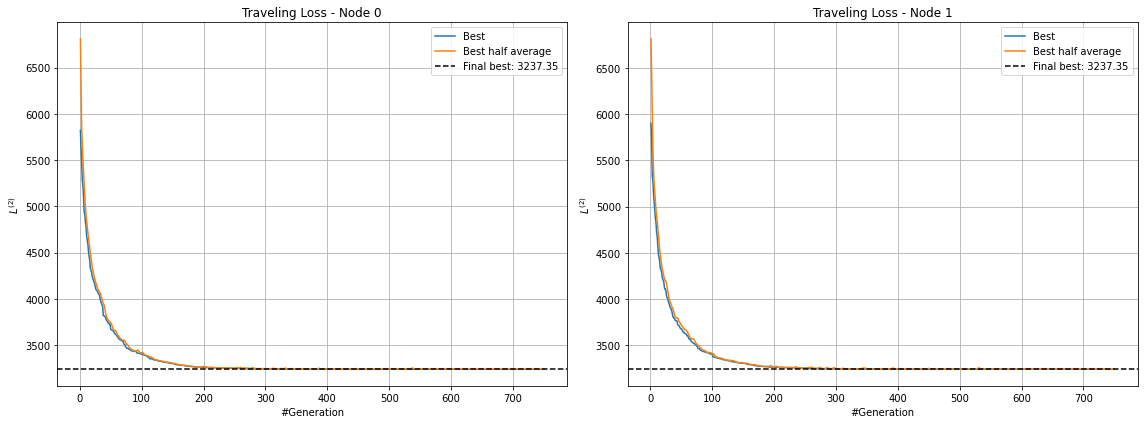

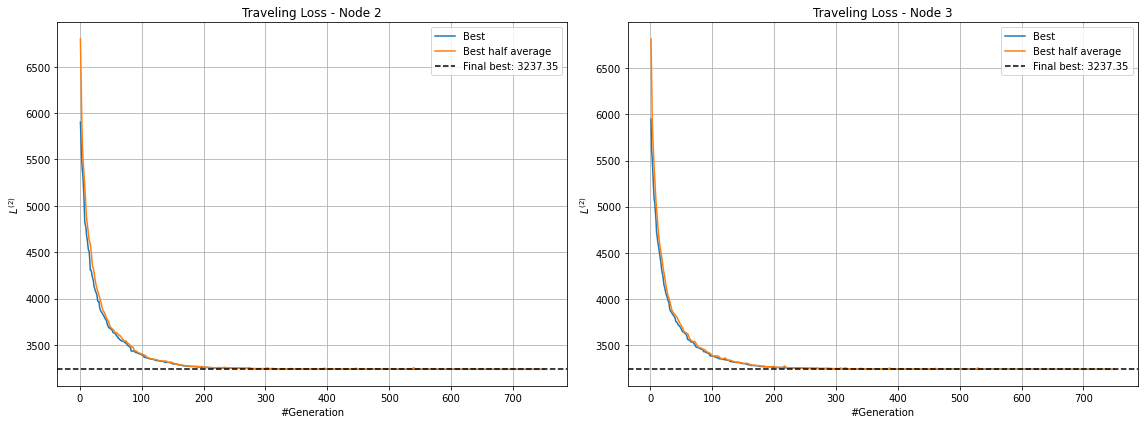

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(loss_best_5['Generazione'],loss_best_5['BestLoss'], label='Best')
axs[0].plot(loss_half_5['Generazione'],loss_half_5['HalfLoss'], label='Best half average')
axs[0].axhline(y=3237.35, color = "k", linestyle = "--", label = "Final best: 3237.35")
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel('$L^{(2)}$')
axs[0].set_title('Traveling Loss - Node 0')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(loss_best_6['Generazione'],loss_best_6['BestLoss'], label='Best')
axs[1].plot(loss_half_6['Generazione'],loss_half_6['HalfLoss'], label='Best half average')
axs[1].axhline(y=3237.35, color = "k", linestyle = "--", label = "Final best: 3237.35")
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel('$L^{(2)}$')
axs[1].set_title('Traveling Loss - Node 1')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(loss_best_7['Generazione'],loss_best_7['BestLoss'], label='Best')
axs[0].plot(loss_half_7['Generazione'],loss_half_7['HalfLoss'], label='Best half average')
axs[0].axhline(y=3237.35, color = "k", linestyle = "--", label = "Final best: 3237.35")
axs[0].set_xlabel('#Generation')
axs[0].set_ylabel('$L^{(2)}$')
axs[0].set_title('Traveling Loss - Node 2')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(loss_best_8['Generazione'],loss_best_8['BestLoss'], label='Best')
axs[1].plot(loss_half_8['Generazione'],loss_half_8['HalfLoss'], label='Best half average')
axs[1].axhline(y=3237.35, color = "k", linestyle = "--", label = "Final best: 3237.35")
axs[1].set_xlabel('#Generation')
axs[1].set_ylabel('$L^{(2)}$')
axs[1].set_title('Traveling Loss - Node 3')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

Analizzando l'andamento della loss si può notare però che la perdita di varietà è dovuta solo al fatto che le migrazioni hanno portato i *Continenti* verso una soluzione sensibilmente migliore rispetto a quelle ottenute senza migrazioni. Il tempo di convergenza è rimasto pressochè identico al caso senza migrazioni, tranne che per l'ultimo nodo, per cui è quasi dimezzato (da $400$ generazioni senza migrazioni a $200$ generazioni con migrazioni). Questo può essere spiegato rendendosi conto del fatto che il tempo di convergenza è dato in prima approssimazione dalla complessità del problema e dalla configurazione iniziale da cui si parte. Le migrazioni invece sembrano aiutare maggiormente quando ormai si è già in configurazioni con buona loss, migliorandola ancora di qualche punto.